In [1]:
import pandas as pd
import os

data_df = pd.read_csv(os.path.join('data','house-prices.csv'))
data_df.shape

(2430, 82)

In [2]:
# Number of lines in dataset
total_cell = data_df.shape[0]

# NULL_CELL_LIMIT is the max allowed percentage of null value in a column
NULL_CELL_LIMIT = 0.20

# List of columns that we will drop
columns_to_drop = list()

# Loop in each column and identify the one to drop
for c in data_df.columns:
    no_of_null_cell = data_df[c].isnull().sum()
    if(no_of_null_cell/total_cell > NULL_CELL_LIMIT):
        columns_to_drop.append(c)

print("Columns to drop:", ','.join(columns_to_drop))

Columns to drop: Alley,Fireplace Qu,Pool QC,Fence,Misc Feature


In [3]:

def encodeOrdinalColumnToNumeric(df, columns=[], mapping={}, replacena= None, inplace=True):
    """
    This function replaces values in columns passed as parameter using the mapping dict provided.
    Key of the dict are used as search value in cells, and if match, cell value is replace by the value
    of mapping[key]
    replacena parameter, if different from None is used as replacement of null values
    Inplace parameter is used to perform changes directly on the dataframe passed as parameter or a copy of it
    Whatever the value of inplace parameter, the modified dataframe is returned by ther function
    """
    if(not inplace):
        df = df.copy()
    # replace null values
    if replacena != None:
        df.loc[df[column].isnull(), column] = replacena
    # replace values using mapping
    for key in mapping:
        print(key, mapping[key])
        df.loc[df[column] == key, column] = mapping[key]
    
    return df

mapping = {
    'Ex': 5,
    'Gd': 4,
    'TA': 3,
    'Fa': 2,
    'Po': 1,
}
temp_df = encodeOrdinalColumnToNumeric(data_df, column='Fireplace Qu', mapping=mapping, replacena=0, inplace=False)
# data_df.loc[data_df['Fireplace Qu'] == 'TA', 'Fireplace Qu'] = 10
temp_df[['PID','Fireplace Qu']]['Fireplace Qu'].unique()
temp_df[['PID','Fireplace Qu']].dtypes
data_df[['PID','Fireplace Qu']].dtypes

TypeError: encodeOrdinalColumnToNumeric() got an unexpected keyword argument 'column'

In [ ]:
ordinal_column =[
    'Lot Shape', 'Utilities', 'Land Slope', 'Overall Cond', 'Overall Qual', 'Exter Cond', 'Exter Qual', 'Bsmt Cond', 'Bsmt Qual', 'Bsmt Exposure', 'BsmtFin Type 1',
    'BsmtFin Type 2', 'Heating QC', 'Electrical', 'Kitchen Qual', 'Functional', 'Garage Finish', 'Garage Cond', 'Garage Qual', 'Paved Drive',
]

encodeOrdinalColumnToNumeric(data_df,column)

In [ ]:
data_df[data_df['Total Bsmt SF'] == 0][['Total Bsmt SF','Bsmt Cond','Bsmt Exposure','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1','BsmtFin SF 2']].values

temp_df = data_df[['Total Bsmt SF','Bsmt Unf SF','Bsmt Cond','Bsmt Exposure','Bsmt Qual','BsmtFin Type 1','BsmtFin Type 2','BsmtFin SF 1','BsmtFin SF 2']].copy()
temp_df['Sum'] = data_df['BsmtFin SF 1'] + data_df['BsmtFin SF 2'] + data_df['Bsmt Unf SF']
temp_df['Equal ?'] = temp_df['Sum'] == temp_df['Total Bsmt SF']
temp_df['Equal ?'].value_counts()
temp_df[np.logical_not(temp_df['Equal ?'])]

In [ ]:

data_df['Has Septic'] = np.where(data_df['Utilities'] == 'AllPub', 1,0)


data_df[['PID','Has Septic']].groupby('Has Septic').count()
data_df['Utilities'].value_counts()

In [ ]:
data_df['Utilities'].shape

In [ ]:
data_df[data_df['Utilities'] == 'AllPub'].shape

In [ ]:
import matplotlib.pyplot as plt 
plt.scatter(data_df['Garage Area'], data_df['SalePrice'])

In [ ]:
test_df = pd.read_csv(os.path.join('data','house-prices-test.csv'))
test_df.shape
test_df['Utilities'].value_counts()

In [ ]:
test_df['Utilities'].value_counts()

In [ ]:
data_df.name = 'Train'

In [ ]:
df = pd.DataFrame( data=np.ones([4,4]) )
df.name = 'Ones'

In [ ]:
df.info()

In [11]:


df = pd.DataFrame({'A': ['a', 'b', 'a'], 'B': ['b', 'a', 'c'], 'C': [1, 2, 3]})
df

,A,B,C
0,a,b,1
1,b,a,2
2,a,c,3


In [12]:
pd.get_dummies(df)

,C,A_a,A_b,B_a,B_b,B_c
0,1,1,0,0,1,0
1,2,0,1,1,0,0
2,3,1,0,0,0,1


In [14]:
data_df['Bedroom AbvGr'].unique()

array([4, 2, 3, 1, 5, 0, 6, 8])

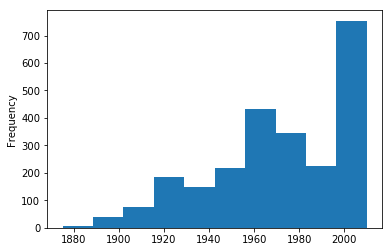

In [15]:
data_df['Year Built'].plot.hist()

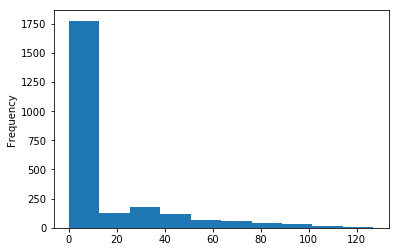

In [18]:
(data_df['Year Remod/Add'] - data_df['Year Built']).plot.hist()